In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
## Some Player Names have accents that should be removed 
import unicodedata
def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

In [18]:
from collections import Counter
df1 = pd.read_csv("Joined Player Stats.csv")
# Get amount of years in the league for a particular player
exp = Counter(df1.Player)

In [19]:
# Ex) A center may have 'NaN' for 3PA
df1.fillna('0',inplace=True)

In [20]:
## Bring in All-NBA history and clean it
import re
all_nba = pd.read_csv('ALL-NBA.csv')
all_nba.drop(columns={'Lg','Tm'},inplace=True)
all_nba_players = list()
all_nba.Season = [re.sub(pattern = '.{2}-',string=all_nba.Season[season],repl = '') for season in range(len(all_nba.Season))]
all_nba.Season[all_nba.Season == '1900'] = '2000'
for player_list in all_nba.iloc[:,1:].values:
    year_list = list()
    for player in player_list:
        year_list.append(re.sub("\s[A-Z]$","",player)) 
    all_nba_players.append(year_list)
all_nba.iloc[:,1:] = all_nba_players
all_nba.Season = pd.to_numeric(all_nba.Season)

In [21]:
## Count the number of selections for each player
from collections import Counter
all_NBA_count = Counter(all_nba.iloc[:,1:].values.flatten())


In [22]:
### Create a boolean column indicating if a player was selected that year
df1['AllNBA'] = np.zeros(shape = df1['All-NBA Selections'].shape)
from collections import Counter
for year in all_nba.Season.unique():
    new_all_nba = all_nba[all_nba.Season == year]
    for player in df1.Player[df1.Year == year]:
        if player in all_nba[all_nba.Season ==year].iloc[:,1:].values.flatten():
            df1['AllNBA'][(df1.Player == player) & (df1.Year == year)] +=1
    

c:\users\samee_000.sameer\python3.7\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
df1['AllNBA'].value_counts()
all_nba1 = all_nba[all_nba.Season >= 1990]
len(all_nba1.iloc[:,1:].values.flatten())

450

In [24]:
df1.groupby('Player')["AllNBA"].sum().sort_values(ascending = False)[0:10]

Player
Tim Duncan          15.0
Kobe Bryant         15.0
LeBron James        15.0
Shaquille O'Neal    14.0
Karl Malone         14.0
Hakeem Olajuwon     12.0
Dirk Nowitzki       12.0
Michael Jordan      11.0
Charles Barkley     11.0
John Stockton       11.0
Name: AllNBA, dtype: float64

In [25]:
df1.Player = df1['Player'].apply(strip_accents)

In [26]:
## FIND HOW MANY ALL-NBA SELECTIONS A PLAYER HAS LEFT BASED ON HOW MANY THEY'VE ALREADY ONE
index_to_cumsum = pd.Series(df1.groupby('Player')['AllNBA'].cumsum().sort_values(ascending = False),name="Cumulative AllNBA")
df = pd.concat([df1, index_to_cumsum], axis=1)
df[df['Player'] == 'LeBron James']
df['AllNBA Left'] = abs(df['All-NBA Selections'].values - df['Cumulative AllNBA'].values)


In [27]:
df["All-NBA Selections"] = df['Player'].map(all_NBA_count)
df.loc[:,['All-NBA Selections','AllNBA Left','Cumulative AllNBA']][df.Player == 'LeBron James']

,All-NBA Selections,AllNBA Left,Cumulative AllNBA
9234,15,15.0,0.0
9688,15,14.0,1.0
10144,15,13.0,2.0
10602,15,12.0,3.0
11064,15,11.0,4.0
11512,15,10.0,5.0
11970,15,9.0,6.0
12416,15,8.0,7.0
12875,15,7.0,8.0
13332,15,6.0,9.0


In [28]:
df.isnull().sum()

Unnamed: 0            0
Player                0
Pos                   0
Age                   0
Tm                    0
G                     0
MP                    0
PER                   0
TS%                   0
3PAr                  0
FTr                   0
ORB%                  0
DRB%                  0
TRB%                  0
AST%                  0
STL%                  0
BLK%                  0
TOV%                  0
USG%                  0
OWS                   0
DWS                   0
WS                    0
WS/48                 0
OBPM                  0
DBPM                  0
BPM                   0
VORP                  0
Year                  0
All-NBA Selections    0
2P                    0
2P%                   0
2PA                   0
3P                    0
3P%                   0
3PA                   0
AST                   0
BLK                   0
DRB                   0
Exp                   0
FG                    0
FG%                   0
FGA             

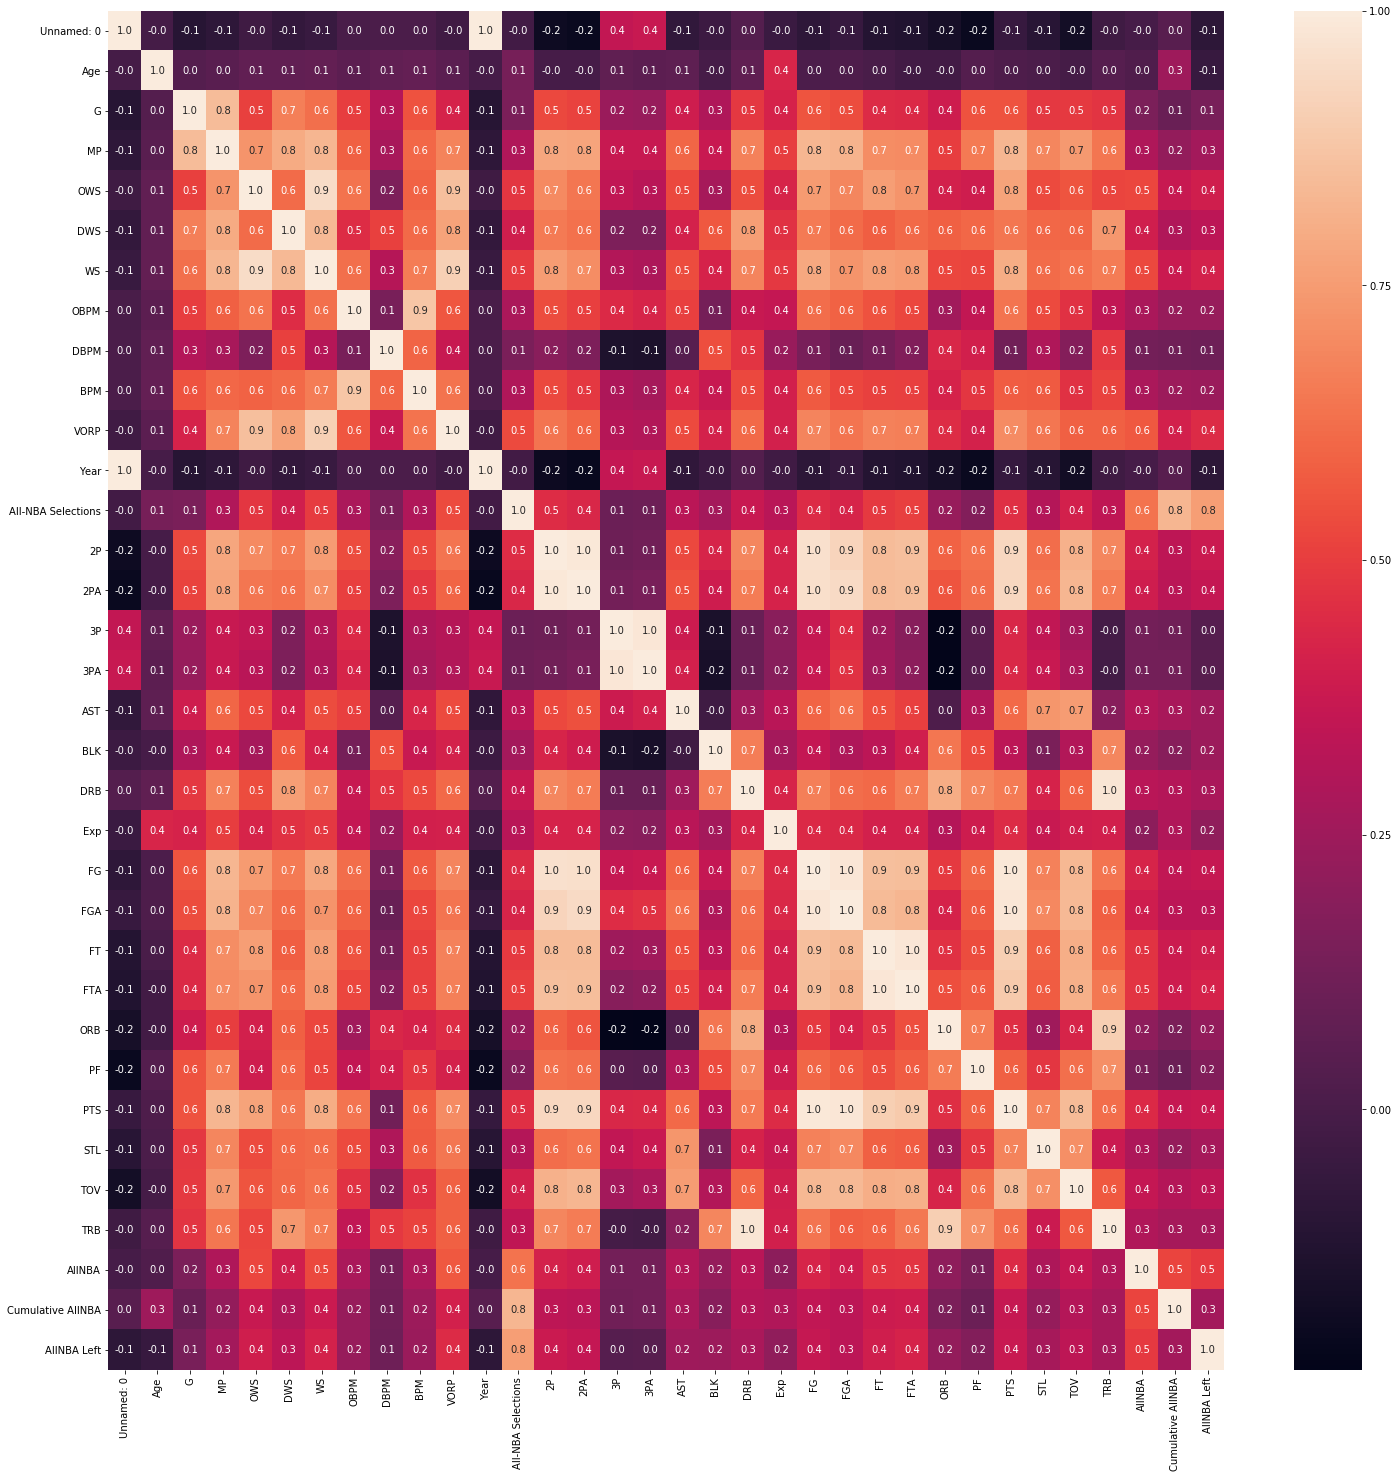

In [29]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr, annot=True, fmt=".1f")

In [30]:
df.to_csv('Model Set.csv')